In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
from sklearn.model_selection import train_test_split
from ISLP import confusion_table

In [2]:
from functools import partial
from sklearn.model_selection import \
     (cross_validate,
      KFold,
      ShuffleSplit)
from sklearn.base import clone
from ISLP.models import sklearn_sm

In [3]:
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.pipeline import Pipeline
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

In [5]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)

In [6]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm

# 5.

We have seen that we can ft an SVM with a non-linear kernel in order
to perform classifcation using a non-linear decision boundary. We will
now see that we can also obtain a non-linear decision boundary by
performing logistic regression using non-linear transformations of the
features.

# a)

In [69]:
rng = np.random.default_rng(5)
x1 = rng.uniform(size=500) - 0.5
x2 = rng.uniform(size=500) - 0.5
y = x1**2 - x2**2 > 0

# b)

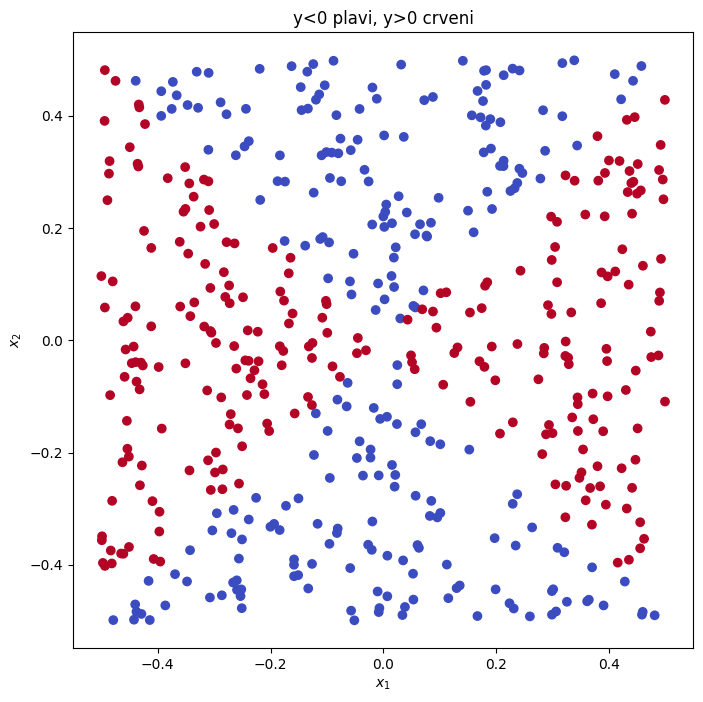

In [70]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x1,
           x2,
           c=y,
           cmap=plt.cm.coolwarm);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('y<0 plavi, y>0 crveni')
plt.show()

# c)

In [71]:
X = np.vstack((x1, x2)).T # U zadatku se ne traži razdvajanje na train i test.

In [72]:
glm_train = sm.GLM(y,
                   X,
                   family=sm.families.Binomial())

results = glm_train.fit()
summarize(results)

,coef,std err,z,P>|z|
x1,-0.1698,0.307,-0.553,0.580
x2,0.0891,0.306,0.291,0.771


# d)

In [73]:
probs = results.predict(exog=X)
y_log = np.array([False]*len(y))
y_log[probs>0.5] = True 

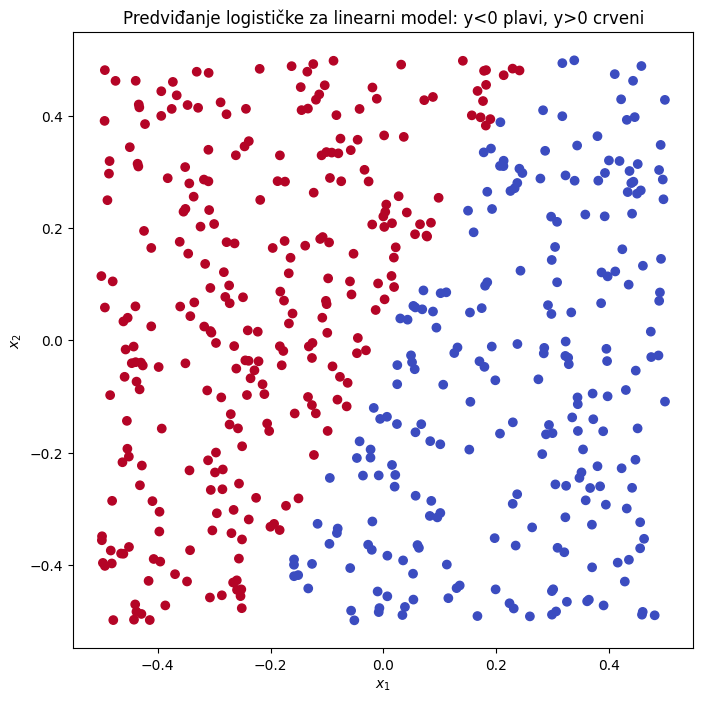

In [74]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x1,
           x2,
           c=y_log,
           cmap=plt.cm.coolwarm);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Predviđanje logističke za linearni model: y<0 plavi, y>0 crveni')
plt.show()

In [75]:
print(accuracy_score(y,
                     y_log))
confusion_table(y_log, y)

0.5


Truth,False,True
Predicted,,
False,113,116
True,134,137


# e)

In [76]:
x1_kvadrat = x1**2

In [77]:
X = np.vstack((x1, x2,x1_kvadrat)).T

In [78]:
glm_train = sm.GLM(y,
                   X,
                   family=sm.families.Binomial())

results = glm_train.fit()
summarize(results)

,coef,std err,z,P>|z|
x1,-0.0826,0.357,-0.232,0.817
x2,0.1751,0.329,0.532,0.595
x3,7.0602,0.953,7.410,0.000


# f)

In [79]:
probs = results.predict(exog=X)

In [80]:
y_log = np.array([False]*len(y))
y_log[probs>0.5] = True 

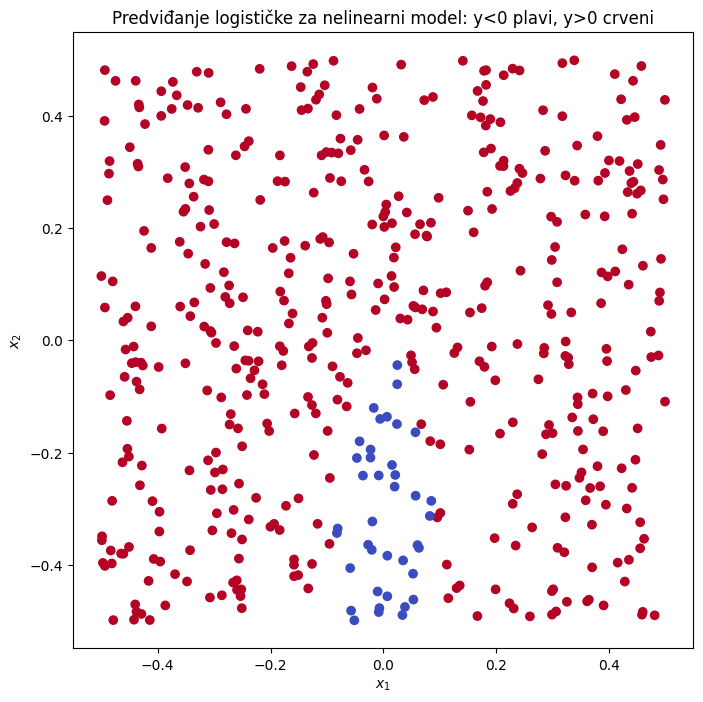

In [81]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x1,
           x2,
           c=y_log,
           cmap=plt.cm.coolwarm);
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Predviđanje logističke za nelinearni model: y<0 plavi, y>0 crveni')
plt.show()

In [82]:
print(accuracy_score(y,
                     y_log))
confusion_table(y_log, y)

0.584


Truth,False,True
Predicted,,
False,39,0
True,208,253


# g)

In [83]:
X = np.vstack((x1, x2)).T
svm_linear = SVC(C=100000, kernel='linear') #Veći red veličine C od ovog znatno povećava vrijeme računa
svm_linear.fit(X, y)

SVC(C=100000, kernel='linear')

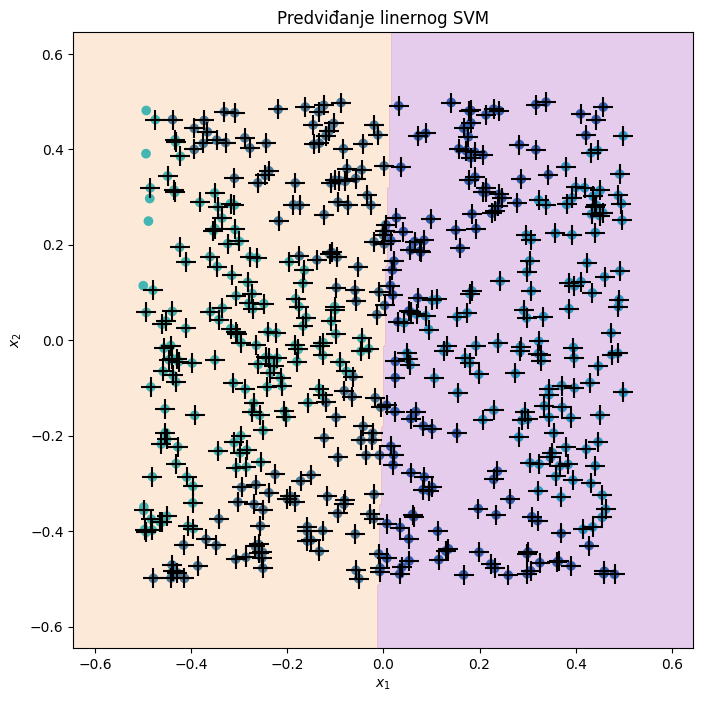

In [84]:
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Predviđanje linernog SVM')
plt.show()

In [85]:
print(accuracy_score(y,
                     svm_linear.predict(X)))
y_hat = svm_linear.predict(X)
confusion_table(y_hat, y)

0.508


Truth,False,True
Predicted,,
False,117,116
True,130,137


# f)

# Radijalni kernel:

In [86]:
svm_rbf = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf.fit(X, y)

SVC(C=1, gamma=1)

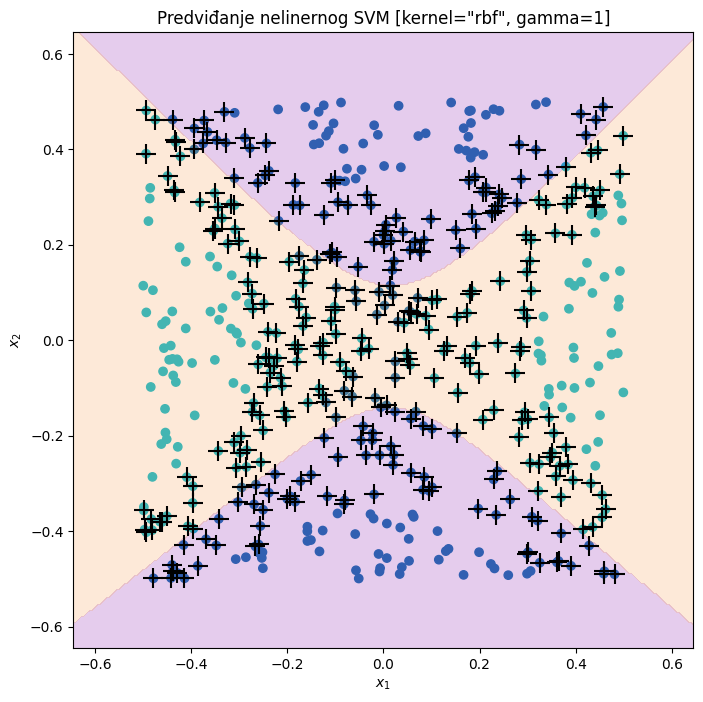

In [87]:
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf,
         ax=ax)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Predviđanje nelinernog SVM [kernel="rbf", gamma=1]')
plt.show()

In [88]:
print(accuracy_score(y,
                     svm_rbf.predict(X)))
y_hat = svm_rbf.predict(X)
confusion_table(y_hat, y)

0.944


Truth,False,True
Predicted,,
False,219,0
True,28,253


# Polinomski kernel:

In [89]:
svm_rbf = SVC(kernel="poly", degree=2, C=1)
svm_rbf.fit(X, y)

SVC(C=1, degree=2, kernel='poly')

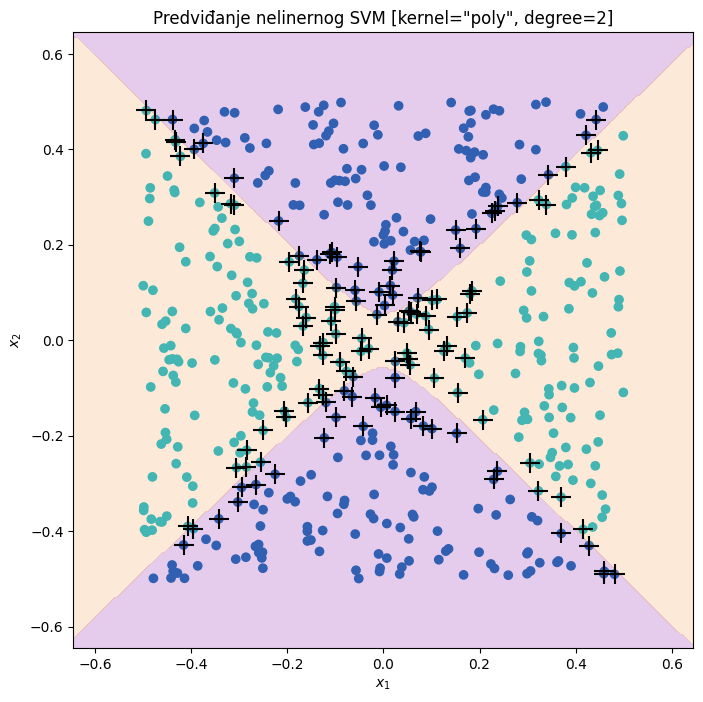

In [90]:
fig, ax = plt.subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_rbf,
         ax=ax)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Predviđanje nelinernog SVM [kernel="poly", degree=2]')
plt.show()

In [91]:
print(accuracy_score(y,
                     svm_rbf.predict(X)))
y_hat = svm_rbf.predict(X)
confusion_table(y_hat, y)

0.98


Truth,False,True
Predicted,,
False,239,2
True,8,251


# i)

Od razmatranih modela, SVM s polinomskim kernelom daje najbolje rezultate s 98% točnosti, također je zanimljivo primijetiti da koristi najmanji broj vektora.

Among the considered models, the SVM with a polynomial kernel gives the best results with 98% accuracy; it is also interesting to note that it uses the smallest number of support vectors.